# Data Exploration

In [25]:
import pandas as pd
from gpx_converter import Converter
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

### Data import

In [26]:
DATA_EXPORT_DIR = 'data export/Apple Health Data Export'

In [27]:
def get_gpx_data_as_df(filepath):
#     df = Converter(input_file=filepath).gpx_to_dataframe()
    xml_tree = ET.parse(filepath)
    root = xml_tree.getroot()
    xmlns = '{http://www.topografix.com/GPX/1/1}' # This is the schema of the data file... it is prepended to all tags within and so is needed when searching.
    trk = root.find(f'{xmlns}trk')
    workout_name = trk.find(f'{xmlns}name').text
    trkseg = trk.find(f'{xmlns}trkseg')
    
    df = pd.DataFrame(columns=['workout_name','datetime','lon','lat','elev','speed','course','hAcc','vAcc'])
    for trkpt in trkseg.findall(f'{xmlns}trkpt'):
        df = df.append(
            {'workout_name':workout_name,
             'datetime':trkpt.find(f'{xmlns}time').text,
             'lon':trkpt.get('lon'),
             'lat':trkpt.get('lat'),
             'elev':trkpt.find(f'{xmlns}ele').text,
             'speed':trkpt.find(f'.//{xmlns}extensions/{xmlns}speed').text,
             'course':trkpt.find(f'.//{xmlns}extensions/{xmlns}course').text,
             'hAcc':trkpt.find(f'.//{xmlns}extensions/{xmlns}hAcc').text,
             'vAcc':trkpt.find(f'.//{xmlns}extensions/{xmlns}vAcc').text
            },ignore_index=True)
        
    df.datetime = pd.to_datetime(df.datetime)
    for col in df.columns:
        if col not in ('workout_name','datetime'):
            df[col] = pd.to_numeric(df[col])
    
    return df

In [19]:
WORKOUT_DIR = os.path.join(DATA_EXPORT_DIR,'workout-routes')
ECG_DIR = os.path.join(DATA_EXPORT_DIR,'electrocardiograms')


WORKOUT_FILE_LIST = os.listdir(WORKOUT_DIR)
ECG_FILE_LIST = os.listdir(ECG_DIR)

In [20]:
for workout_file in WORKOUT_FILE_LIST[:1]:
    rel_path = os.path.join(WORKOUT_DIR, workout_file)
    
    data = get_gpx_data_as_df(rel_path)

data.head()

,workout_name,datetime,lon,lat,elev,speed,course,hAcc,vAcc
0,Route 2019-09-08 1:03pm,2019-09-08 11:41:20+00:00,-2.495944,53.381443,17.492167,3.882764,-1.0,6.708380,5.473464
1,Route 2019-09-08 1:03pm,2019-09-08 11:41:21+00:00,-2.495890,53.381455,17.715006,3.882913,-1.0,6.345994,5.202903
2,Route 2019-09-08 1:03pm,2019-09-08 11:41:22+00:00,-2.495834,53.381468,17.946207,3.883478,-1.0,5.996423,4.939213
3,Route 2019-09-08 1:03pm,2019-09-08 11:41:23+00:00,-2.495779,53.381480,18.171635,3.884566,-1.0,5.681995,4.699025
4,Route 2019-09-08 1:03pm,2019-09-08 11:41:24+00:00,-2.495724,53.381493,18.397200,3.886378,-1.0,5.393605,4.475432


In [24]:
data.describe(datetime_is_numeric=True)

,lon,lat,elev,speed,course,hAcc,vAcc
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
mean,-2.496444,53.383189,18.865018,3.206493,192.222011,1.699571,1.061104
std,0.007662,0.001373,3.551754,0.419148,100.076018,0.424711,0.365637
min,-2.510451,53.380874,13.292803,2.258576,-1.000000,0.901751,0.642951
25%,-2.503002,53.381839,15.686667,2.934560,77.010742,1.700357,1.036805
50%,-2.495456,53.383426,19.112280,3.121787,251.722549,1.700387,1.036819
75%,-2.490319,53.384251,22.019346,3.478953,261.037781,1.702821,1.038425
max,-2.483718,53.385305,25.484032,5.033028,358.489990,6.708380,5.473464


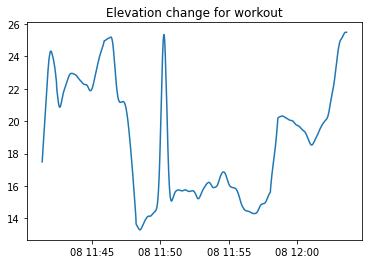

In [22]:
plt.plot(data.datetime,data.elev)
plt.title('Elevation change for workout')
plt.show()